In [276]:
from collections import Counter
import plotly 
import plotly.plotly as py 
import plotly.graph_objs as go
import pandas as pd
from matplotlib import pyplot as plt
from wordcloud import WordCloud
import jieba
import numpy as np
import plotly.tools as tls

In [4]:
df = pd.read_csv('RecentMovie.csv')
df.drop(['Unnamed: 0'], axis=1, inplace=True)
df1 = df.dropna(axis=0, how='any')
df1

,Name,Actors,Introduction,Date
0,欧洲攻略,梁朝伟/吴亦凡,电影《欧洲攻略》由银润传媒集团出品，马楚成担任指导，预计将于2018年8月17日，敬请期待！...,上映：2018年08月17日
2,侠隐,姜文/彭于晏/廖凡/周韵/许晴,《侠隐》这部影片是由姜文执导，姜文、彭于晏、廖凡、周韵、许晴主演，预计在2018年8月上映，...,上映：2018年08月17日
3,快把我哥带走,彭昱畅/张子枫/赵今麦/孙泽源/刘冠毅/方翔锐,《快把我哥带走》这部影片是由万达影视传媒有限公司、深圳市中汇影视文化传播股份有限公司联合出品...,上映：2018年08月17日
4,道高一丈,聂远/谭凯/孔维/徐露/曲高位/张陆,电影《道高一丈》由爱奇艺影业（北京）有限公司、火象（上海）影视文化发展有限公司联合出品，姜凯...,上映：2018年08月17日
5,一出好戏,黄渤/王迅/于和伟/王宝强/张艺兴/舒淇,《一出好戏》这部影片是黄渤的导演处女作，黄渤、王迅、于和伟、王宝强、舒淇等主演，预计在201...,上映：2018年08月17日
6,如影随心,陈晓/杜鹃/王嘉/马苏/关晓彤/高晓攀,《如影随心》这部影片是由万达影业出品，霍建起执导，陈晓、杜鹃、马苏、王嘉等主演，预计在201...,上映：2018年08月17日
7,人质列车,余男/保剑锋/黄奕/斯琴高娃/徐锦江/石兆琪,电影《人质列车》由尹哲执导，保剑锋、余男、黄奕、马克、艾力库参演，将于2018年8月上映。据...,上映：2018年08月17日
12,解码游戏,韩庚/李媛/凤小岳/山下智久,电影《解码游戏》由李海龙导演执导，韩庚、凤小岳、李媛、山下智久参演，该影片将于2018年暑假...,上映：2018年08月17日
13,有五个姐姐的我就注定要单身了啊,谢金燕/刘奕儿/张墨锡/高隽雅/张垚/项婕如,《有五个姐姐的我就注定要单身了啊》这部影片是由谢金燕、刘奕儿、张墨锡、高焦雅、张垚、项婕如、...,上映：2018年08月17日
14,冷恋时代,姚星彤/梦丽/董琦/朱璇/李东艾/立威廉,《冷恋时代》这部影片是由姚星彤、董琦、梦丽、朱璇、李东艾主演，于2018年8月17日上映，据...,上映：2018年08月17日


# 1. How many movies released on each months from August to December?
Firstly, from the movie information that i have grasped on the website, i analyse the quantities of movie from August to December.
According to the line chart, we can find that most movies was released on August. And also, the overall trend is declining. From my point of view, i conjectured that it is because of the summer holiday.

In [168]:
month = ['August', 'September', 'October', 'November', 'December']
Number = [41,19,25,24,14]
trace0 = go.Scatter(
    x = month,
    y = Number,
    name = 'Tendency',
    line = dict(
        color = ('rgb(205, 12, 24)'),
        width = 4,
        dash = 'dash') 
)
layout = dict(title = 'The number of Movies from August to December',
              xaxis = dict(title = 'Month'),
              yaxis = dict(title = 'Amount'),
              )

data = [trace0]
fig = dict(data=data, layout=layout)
py.iplot(fig, filename='Movie Amount')

# 2. In this period, it seems that some actors starred in more than one movie. 
# Who are they?

In [178]:
#将所有actors写在一个list里面

act_list = df1['Actors'].tolist()
act_str = ' '.join(act_list)
act_new = act_str.replace(' ','/')
actors = act_new.split('/')

#因为list里头出现了叫“未知”的演员，因此将list里含“未知”的元素去掉
length=len(actors)
x=0
while x < length:
    if actors[x] == '未知':
        del actors[x]
        x -= 1
        length -= 1
    x += 1

Counter(actors)
Act_Freq = Counter(actors).most_common(51)

df2 = pd.DataFrame(Act_Freq)
df2.columns.values
df2.columns = ['Actor','Frequency']

Act_Freq

[('郭政建', 3),
 ('凯特·布兰切特', 3),
 ('廖凡', 2),
 ('张子枫', 2),
 ('聂远', 2),
 ('王宝强', 2),
 ('关晓彤', 2),
 ('郑恺', 2),
 ('甄子丹', 2),
 ('王雪沁', 2),
 ('吴凡', 2),
 ('周宗禹', 2),
 ('张艺文', 2),
 ('唐泽宗', 2),
 ('杰克·布莱克', 2),
 ('本尼迪克特·康伯巴奇', 2),
 ('迪·埃金', 2),
 ('埃迪·雷德梅恩', 2),
 ('妮可·基德曼', 2),
 ('艾德·斯克林', 2),
 ('艾米莉·布朗特', 2),
 ('林-曼努尔·米兰达', 2),
 ('梁朝伟', 1),
 ('吴亦凡', 1),
 ('姜文', 1),
 ('彭于晏', 1),
 ('周韵', 1),
 ('许晴', 1),
 ('彭昱畅', 1),
 ('赵今麦', 1),
 ('孙泽源', 1),
 ('刘冠毅', 1),
 ('方翔锐', 1),
 ('谭凯', 1),
 ('孔维', 1),
 ('徐露', 1),
 ('曲高位', 1),
 ('张陆', 1),
 ('黄渤', 1),
 ('王迅', 1),
 ('于和伟', 1),
 ('张艺兴', 1),
 ('舒淇', 1),
 ('陈晓', 1),
 ('杜鹃', 1),
 ('王嘉', 1),
 ('马苏', 1),
 ('高晓攀', 1),
 ('余男', 1),
 ('保剑锋', 1),
 ('黄奕', 1)]

In [179]:
plotly.tools.set_credentials_file(username='ninazhang_', api_key='h5O9Jcl2bC8h4pE4yTx6')

trace0 = go.Bar(
    x=df2['Actor'],
    y=df2['Frequency'],    
    marker=dict(
        color='rgba(204,204,204,1)',
    )
)

data = [trace0]
layout = go.Layout(
    title='The Number of Actors Acting in Movies',
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='Actors Frequency')

From this chart, we can find that actor '郭政建' and '凯特·布兰切特' starred in movie three times, whereas the majority of actors starred in only one movie in this period.

# 3. What is the main content of the movies?

In this part, we are going to find out what exactly the movies talk about.

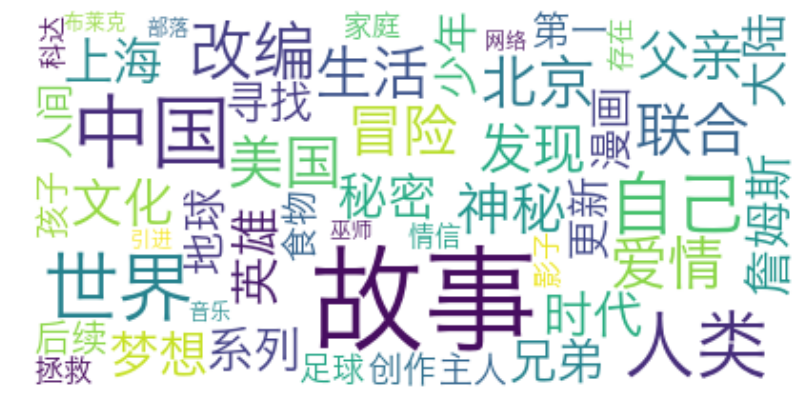

In [277]:
Intro_list = df1['Introduction'].tolist()
Intro_str = ' '.join(Intro_list)
Intro = Intro_str.replace('，','')
    
cut = jieba.cut(Intro)
lis = ','.join(jieba.cut(Intro,cut_all = True))
Intro_cut_list = lis.split(',')
#Word_Freq = Counter(Intro_cut_list).most_common(10)

Intro_Word_Freq=[]
stop_words = ["详情","电影","","据悉","影片","一个","10","这部","主要","有限","公司","讲述","执导","11","有限公司","有望"
             ,"公司出品","出品","他们","要是","主演","领衔","领衔主演","一起","传媒","上映","预计","12","17","一场","24","21"
             ,"2018","一次","因为","一只","最终","一名","已经","以及","担任","饰演","根据","该片","发生","陆续","成为","这个"
             ,"19","克斯","找到","一对","导演","配音","敬请","主角","敬请期待","指导","国大","正在","制作","名叫","编剧","26"
             ,"贝尔","莱克","为了","合出","文化传媒","开始","影视","影业","即将","期待"]
for i in Intro_cut_list:
    if i not in stop_words and len(i)>1:
        Intro_Word_Freq.append(i)
x=pd.Series(Intro_Word_Freq).value_counts().head(50)
wc = WordCloud(background_color="white",font_path = 'Hiragino Sans GB.ttc',max_words=2000,
               max_font_size=60, random_state=40)
wc.generate_from_frequencies(x)
plt.figure(figsize=(14, 7))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

I collected the data and try to learn about the most frequent words mentioned in their movie introduction.
From the board, we can find that the movies are about '家庭','爱情','冒险','人类','英雄'and '梦想'. It is interesting because it seems that the movies are not just about the war and the science fiction anymore. And probably we can guess that the movie preference of audience is changing.

In [278]:
#错误代码

# Intro_Word_Freq
# Intro_Word_rank=sorted(Intro_Word_Freq.items(),key=lambda item:item[1],reverse = True)
# Intro_Word_rank[0:10]

# df3 = pd.DataFrame(Intro_Word_rank[0:10])
# df3.columns.values
# df3.columns = ['Word','Frequency']

# Intro_rank_list = df3['Word'].tolist()
# Intro_rank_list2 = df3['Frequency'].tolist()

# dict(zip(Intro_rank_list,Intro_rank_list2))

# wc = WordCloud(background_color='lightyellow',font_path = 'Hiragino Sans GB.ttc')
# w = wc.generate_from_frequencies(dict(zip(Intro_rank_list,Intro_rank_list2)))
# plt.imshow(w)
# plt.axis('off')